# Loan Approval Prediction using DecisionTree vs RandomForest

# Import Libraries

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

In [14]:
df = pd.read_csv('loan-train.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [16]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# data preprocessing

In [17]:
# check the number of unique value on object datatype
df.select_dtypes(include='object').nunique()

Loan_ID          614
Gender             2
Married            2
Dependents         4
Education          2
Self_Employed      2
Property_Area      3
Loan_Status        2
dtype: int64

In [18]:
df.drop('Loan_ID',axis=1, inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [19]:
# check the missing value
check_missing = df.isna().sum()*100/ df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Credit_History      8.143322
Self_Employed       5.211726
LoanAmount          3.583062
Dependents          2.442997
Loan_Amount_Term    2.280130
Gender              2.117264
Married             0.488599
dtype: float64

In [20]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Label Encoding for Object datatypes

In [21]:
# loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Gender: ['Male' 'Female' nan]
Married: ['No' 'Yes' nan]
Dependents: ['0' '1' '2' '3+' nan]
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes' nan]
Property_Area: ['Urban' 'Rural' 'Semiurban']
Loan_Status: ['Y' 'N']


In [25]:
from sklearn.preprocessing import LabelEncoder

# loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # initialize a  LabelEncoder object
    le = LabelEncoder()

    # fit and transform unique value in the columns
    le.fit(df[col].unique())

    # transform the column using the encoder
    df[col] = le.transform(df[col])

    # print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Gender: [1 0 2]
Married: [0 1 2]
Dependents: [0 1 2 3 4]
Education: [0 1]
Self_Employed: [0 1 2]
Property_Area: [2 0 1]
Loan_Status: [1 0]


In [26]:
df.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

# Exploratory data analysis

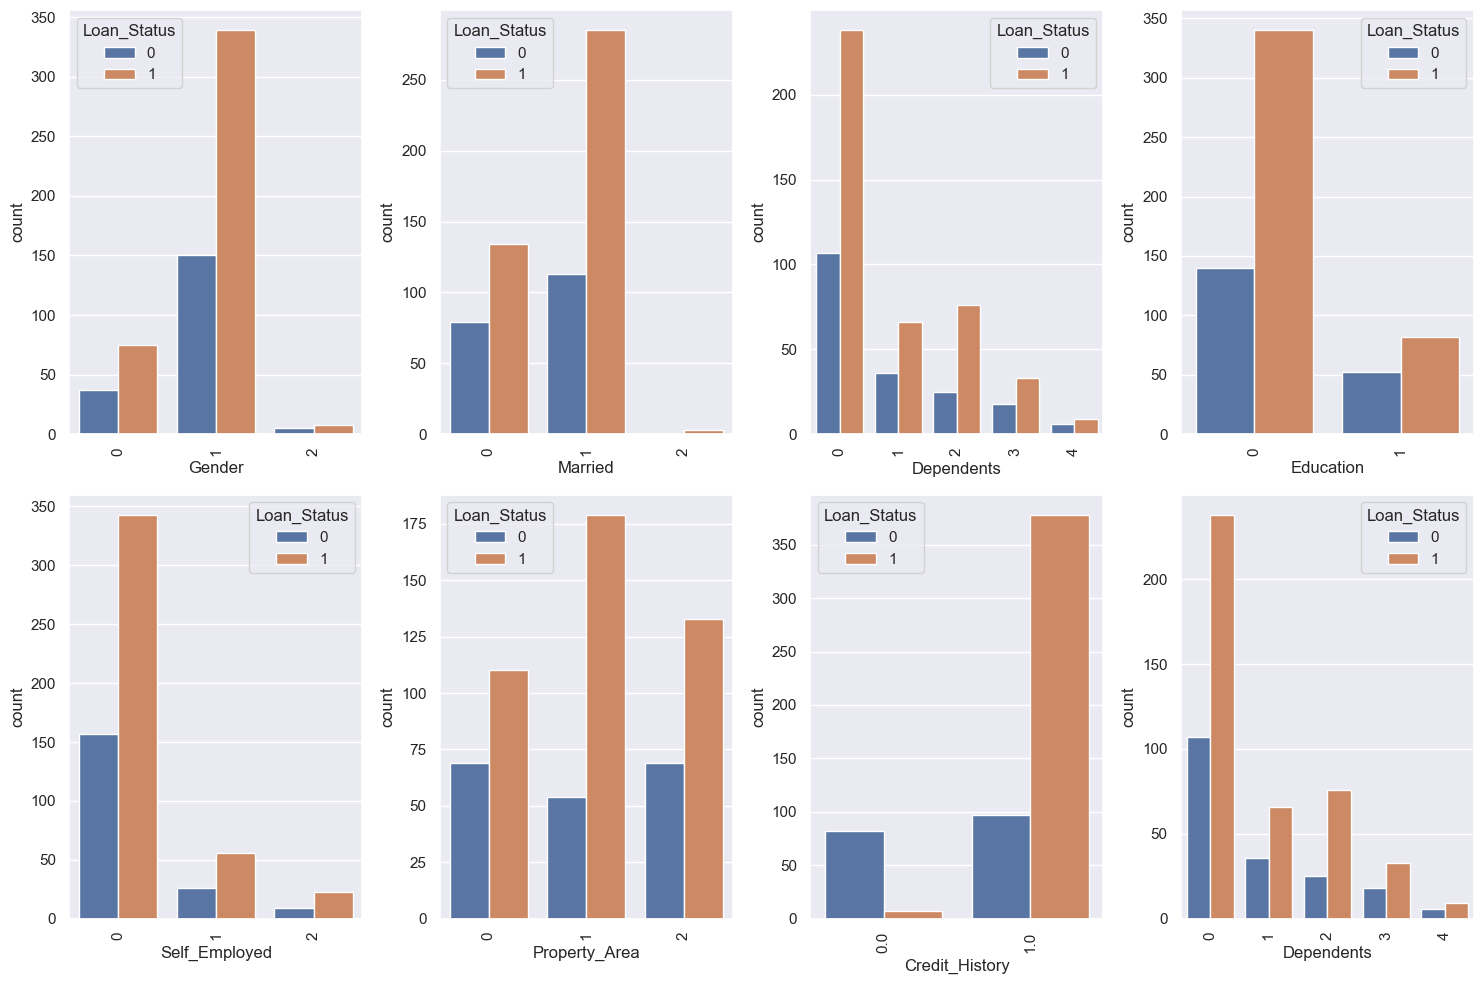

In [30]:
import warnings
warnings.filterwarnings('ignore')
# list of categorical variables to plot
cat_vars = ['Gender', 'Married', 'Dependents', 'Education', 
            'Self_Employed', 'Property_Area', 'Credit_History', 'Dependents']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Loan_Status', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

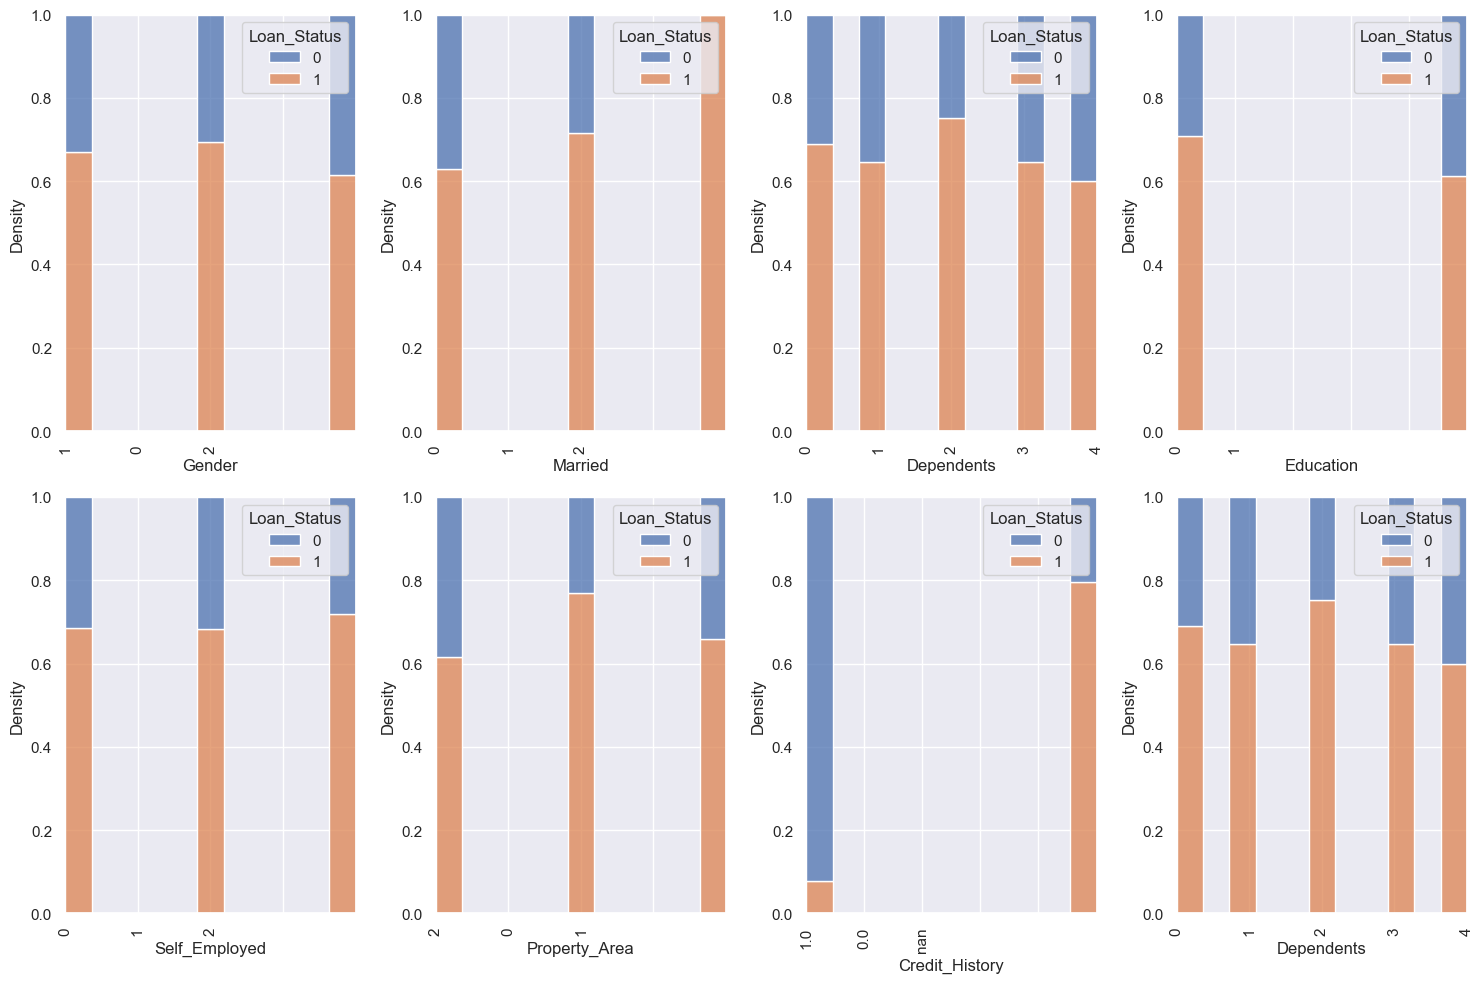

In [31]:
# get list of categorical variables
cat_vars = ['Gender', 'Married', 'Dependents', 'Education', 
            'Self_Employed', 'Property_Area', 'Credit_History', 'Dependents']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axs = axs.flatten()

# create histplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='Loan_Status', data=df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xticklabels(df[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

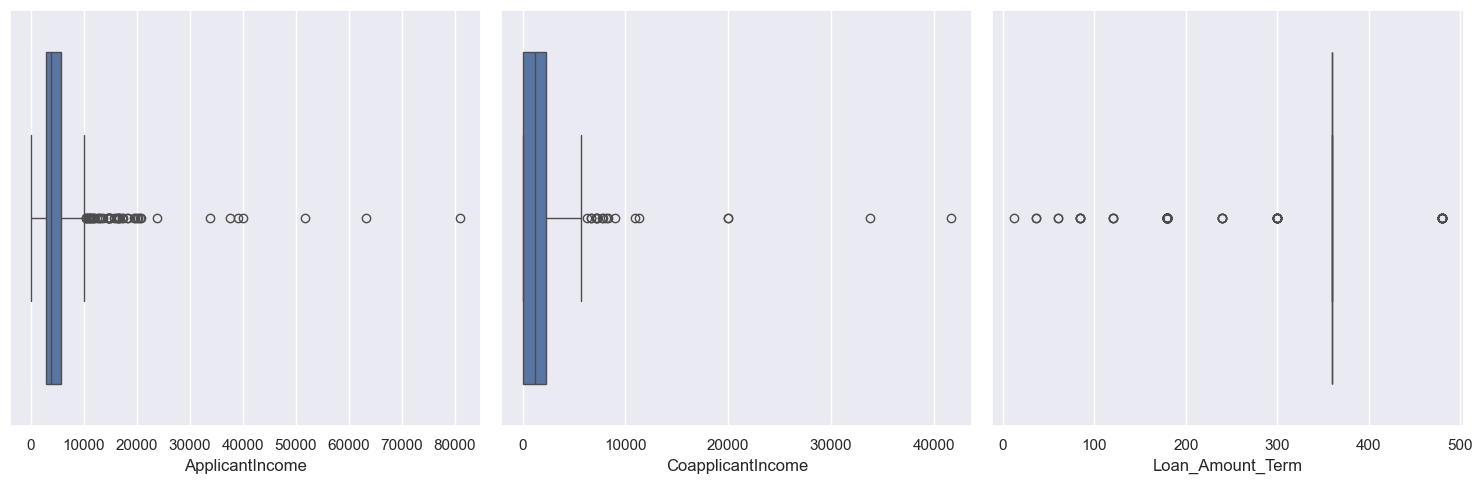

In [36]:
num_vars = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

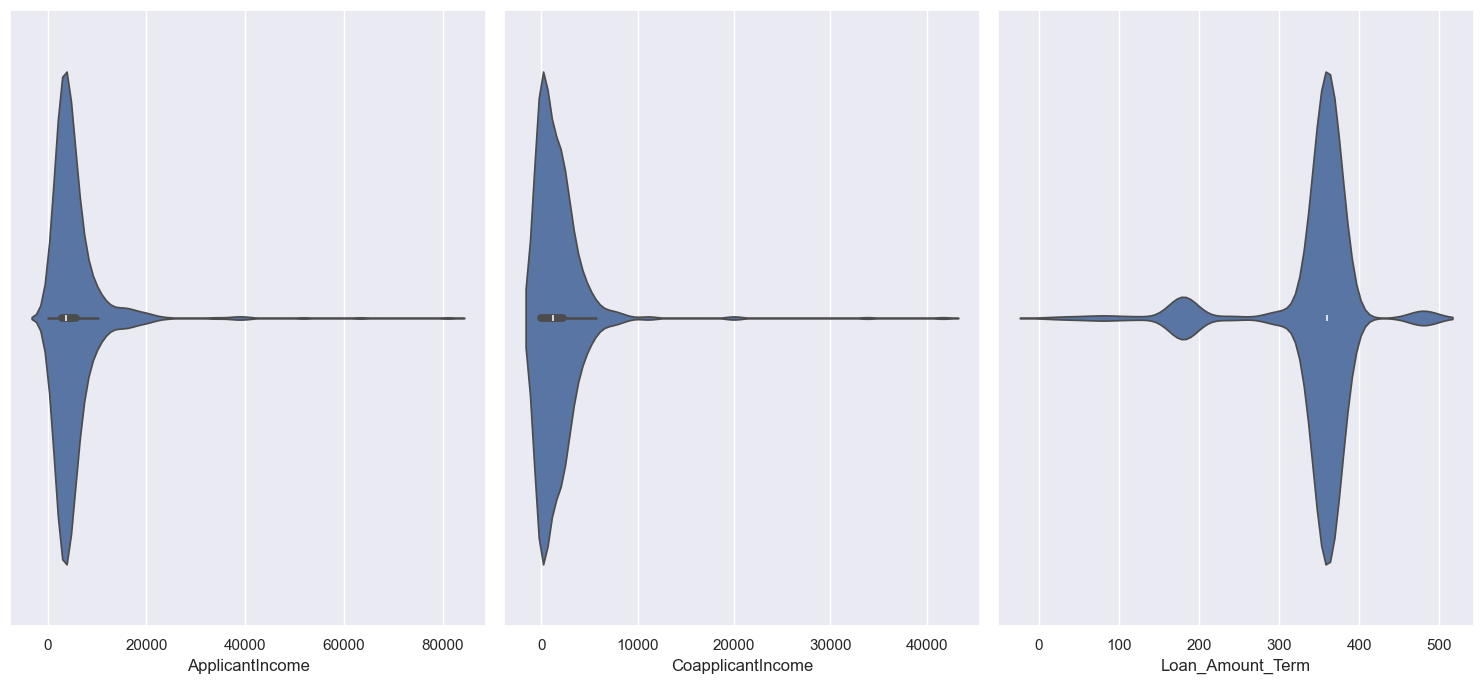

In [37]:
num_vars = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()
plt.show()

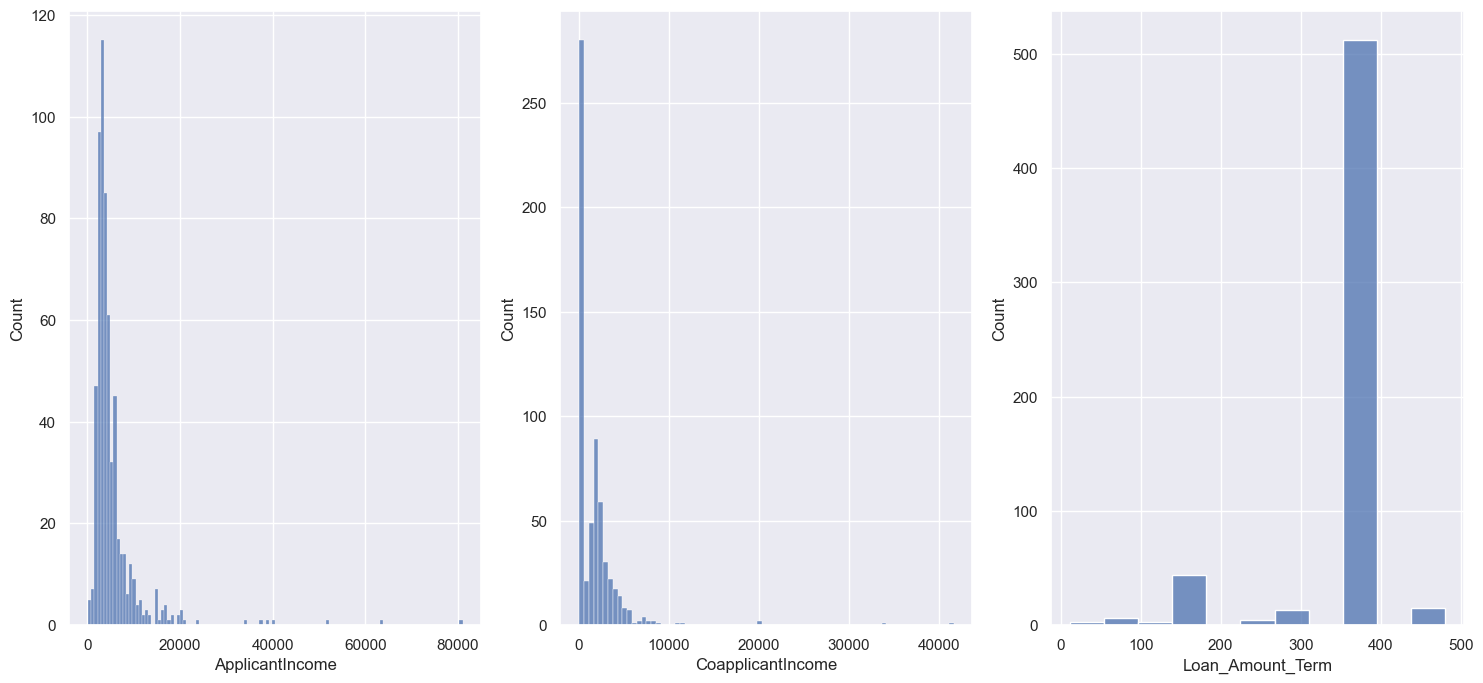

In [43]:
num_vars = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var, data=df, ax=axs[i])

fig.tight_layout()
plt.show()

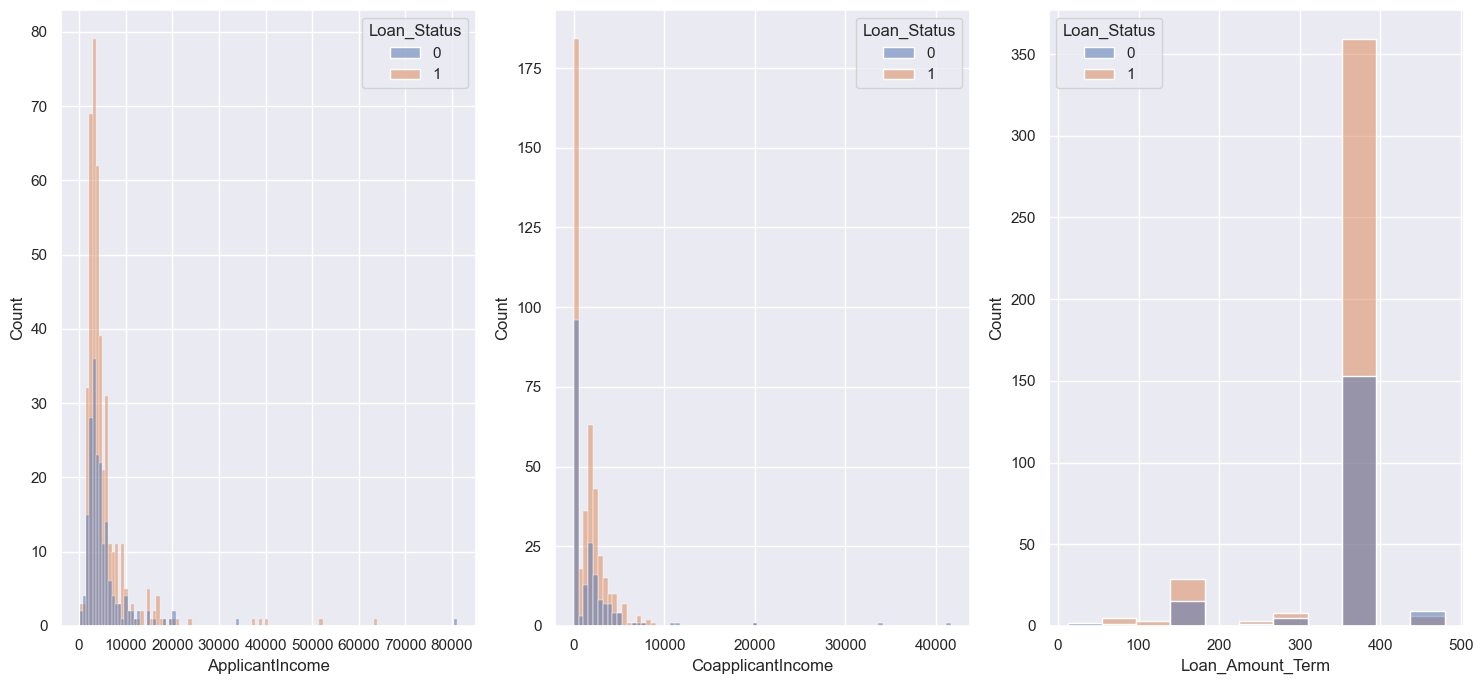

In [45]:
num_vars = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var, data=df, hue='Loan_Status', ax=axs[i])

fig.tight_layout()

plt.show()

## Check if the label 'Loan_Status' is balanced or not

Loan_Status
1    422
0    192
Name: count, dtype: int64

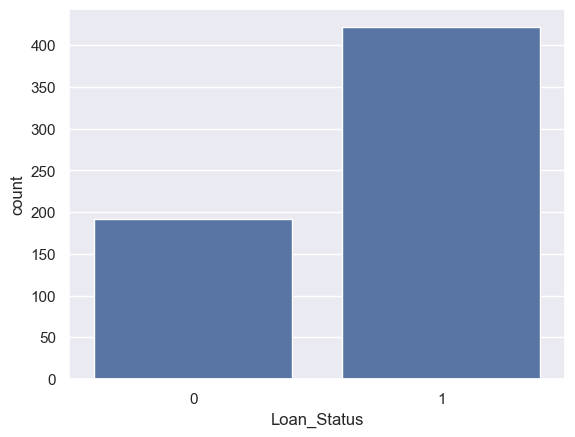

In [48]:
sns.countplot(x=df['Loan_Status'])
df['Loan_Status'].value_counts()

## oversampling minority class to balance the label

In [49]:
from sklearn.utils import resample

# create two different dataframe of majority and minority class
df_majority = df[(df['Loan_Status']==1)]
df_minority = df[(df['Loan_Status']==0)]

# upsample minority class
df_minority_upsampled = resample(df_minority, replace=True,  # sample with replacement
                                n_samples=422,               # to match majority class
                                random_state=0)              # reproducible results

# combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

Loan_Status
0    422
1    422
Name: count, dtype: int64

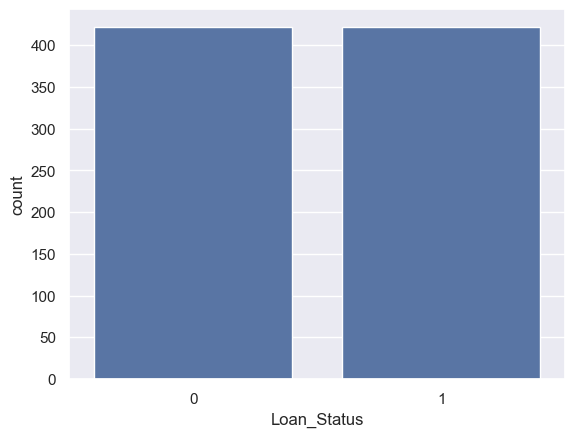

In [53]:
sns.countplot(x=df_upsampled['Loan_Status'])
df_upsampled['Loan_Status'].value_counts()

In [54]:
df_upsampled.shape

(844, 12)

## Remove Outlier using IQR method

In [58]:
# specify the columns to remove outlier from dataframe
column_names = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']

# remove outlier for each selected column using the IQR method
for column_names in column_names:
    Q1 = df_upsampled[column_names].quantile(0.25)
    Q3 = df_upsampled[column_names].quantile(0.75)
    IQR = Q3 - Q1
    df_upsampled = df_upsampled[~((df_upsampled[column_names] < (Q1 - 1.5 * IQR))  | (df_upsampled[column_names] > (Q3 + 1.5 * IQR)))]
df_upsampled.head()   

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
148,0,0,0,0,0,10000,1666.0,225.0,360.0,1.0,0,0
338,0,0,3,1,0,1830,0.0,NaN,360.0,0.0,2,0
24,1,1,1,0,2,3717,2925.0,151.0,360.0,NaN,1,0
57,1,1,0,0,0,3366,2200.0,135.0,360.0,1.0,0,0
107,1,0,0,1,2,7333,0.0,120.0,360.0,1.0,0,0


In [59]:
# check the shape after outlier removal
df_upsampled.shape

(634, 12)

<Axes: >

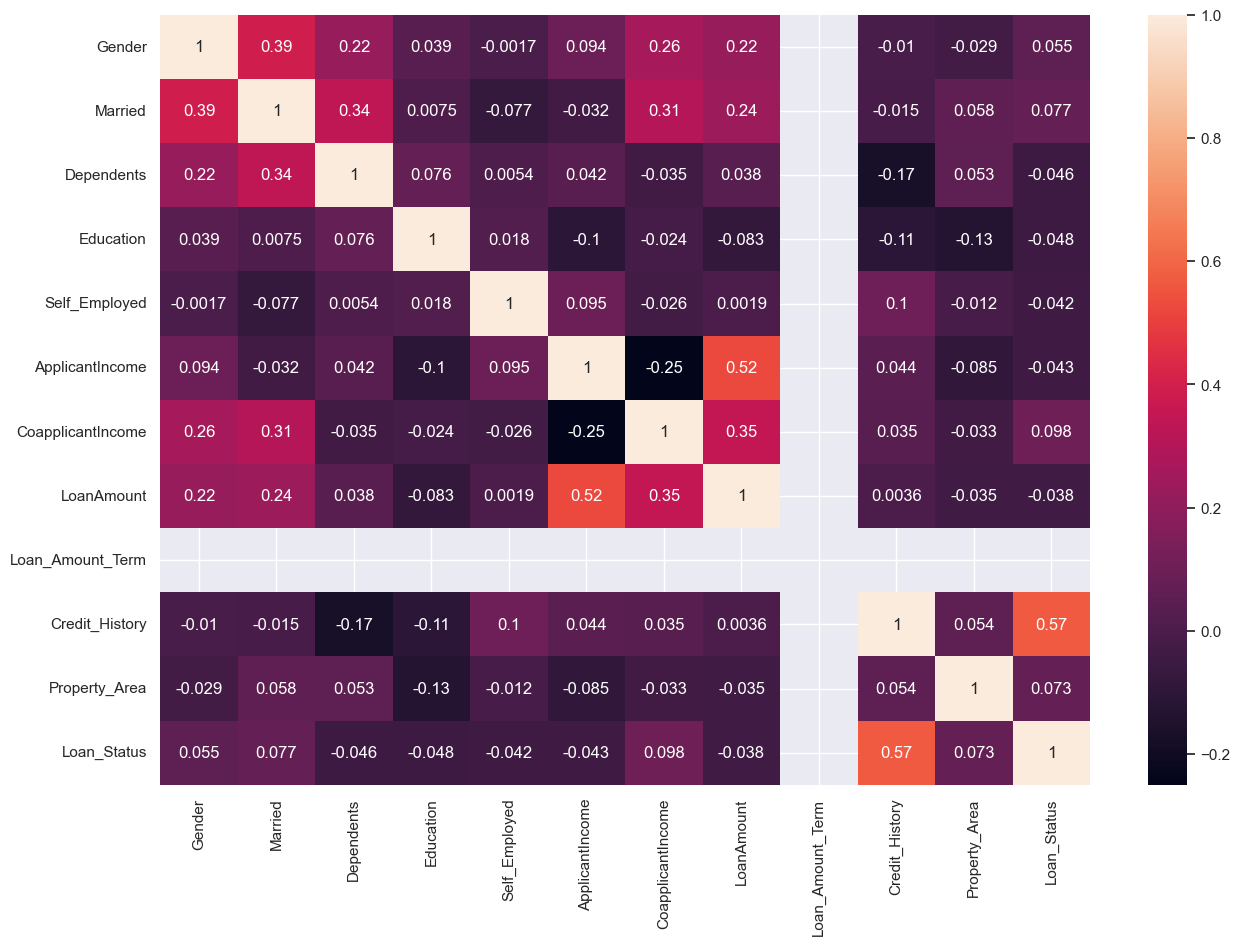

In [60]:
plt.figure(figsize=(15,10))
sns.heatmap(df_upsampled.corr(), fmt='.2g', annot=True)

In [61]:
df_upsampled.drop('Loan_Amount_Term', axis=1, inplace=True)
df_upsampled.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
148,0,0,0,0,0,10000,1666.0,225.0,1.0,0,0
338,0,0,3,1,0,1830,0.0,NaN,0.0,2,0
24,1,1,1,0,2,3717,2925.0,151.0,NaN,1,0
57,1,1,0,0,0,3366,2200.0,135.0,1.0,0,0
107,1,0,0,1,2,7333,0.0,120.0,1.0,0,0


# Train Test Split

In [62]:
X = df_upsampled.drop('Loan_Status', axis=1)
y = df_upsampled['Loan_Status']

In [63]:
# test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier()

param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [69]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=8, min_samples_leaf=1, min_samples_split=2)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=0)

In [70]:
y_pred = dtree.predict(X_test)

In [71]:
print('Accurcy Score:', accuracy_score(y_test, y_pred)*100, 2)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accurcy Score: 81.10236220472441 2
Confusion Matrix:
 [[47  8]
 [16 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.85      0.80        55
           1       0.88      0.78      0.82        72

    accuracy                           0.81       127
   macro avg       0.81      0.82      0.81       127
weighted avg       0.82      0.81      0.81       127



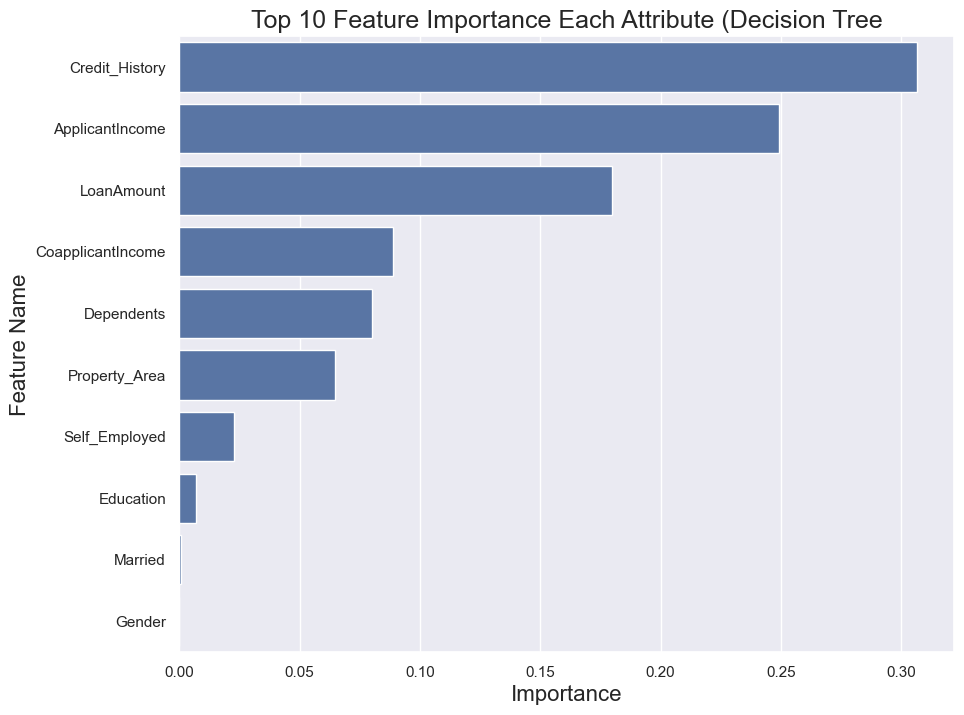

In [73]:
imp_df = pd.DataFrame({
    'Feature Name': X_train.columns,
    'Importance': dtree.feature_importances_
})
fi = imp_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attribute (Decision Tree', fontsize=18 )
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.8110236220472441')

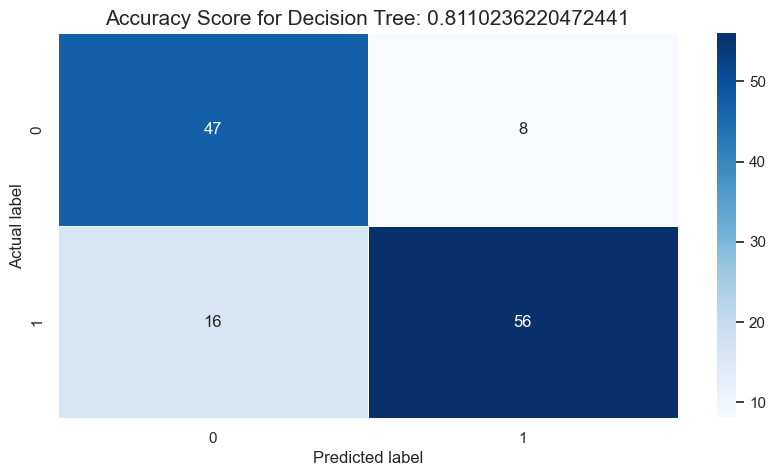

In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

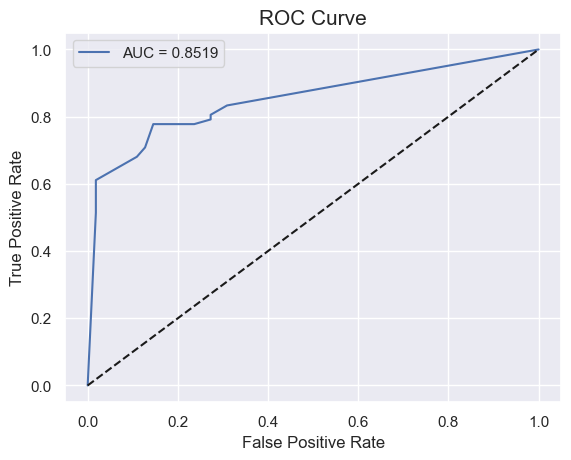

In [80]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()

param_grid = ({
    'n_estimators': [100,200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt','log2', 'None']
})

# perform a grid search with cross- validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 100}


In [82]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0,max_depth=10, max_features='log2', n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', random_state=0)

In [83]:
y_pred = rfc.predict(X_test)

In [84]:
print('Accurcy Score:', accuracy_score(y_test, y_pred)*100, 2)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accurcy Score: 88.9763779527559 2
Confusion Matrix:
 [[48  7]
 [ 7 65]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        55
           1       0.90      0.90      0.90        72

    accuracy                           0.89       127
   macro avg       0.89      0.89      0.89       127
weighted avg       0.89      0.89      0.89       127



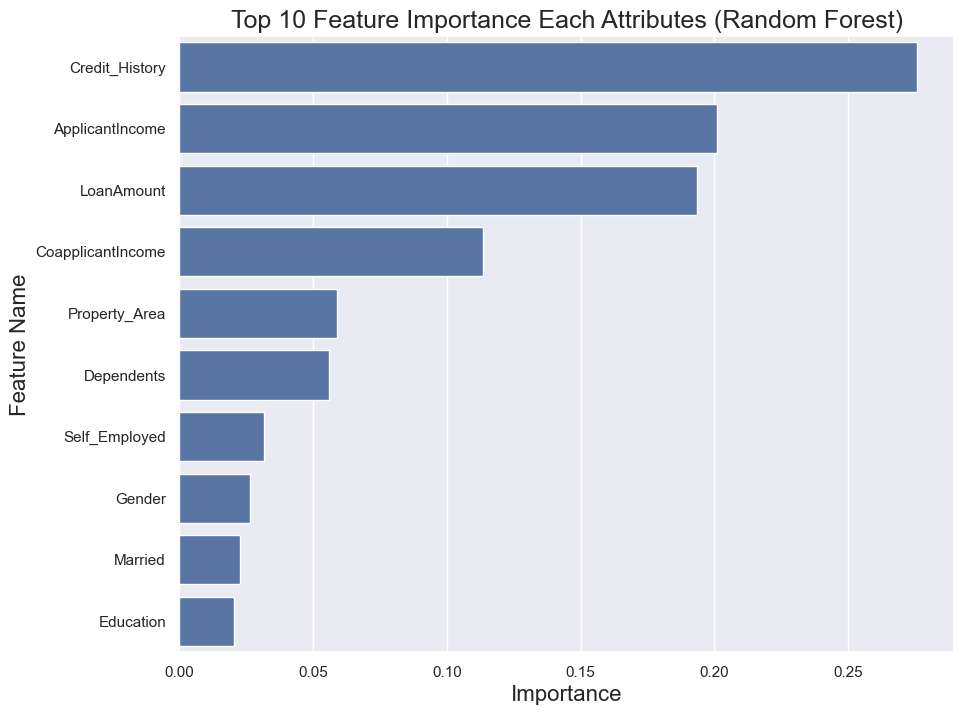

In [85]:
imp_df = pd.DataFrame({
    'Feature Name': X_train.columns,
    'Importance': rfc.feature_importances_
})

fi = imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.889763779527559')

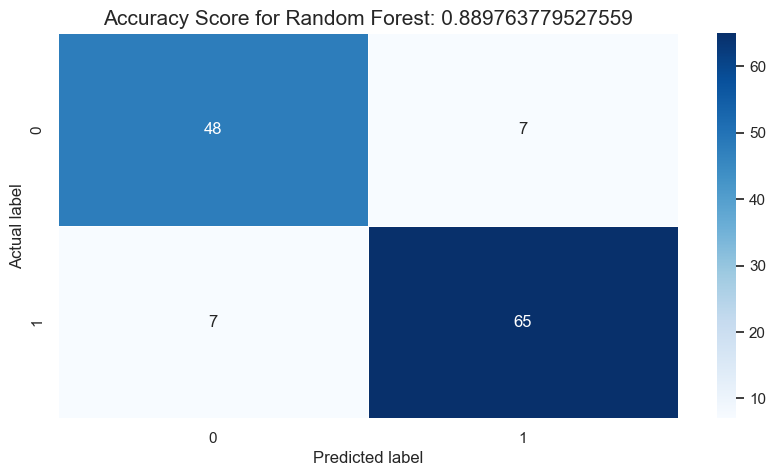

In [87]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

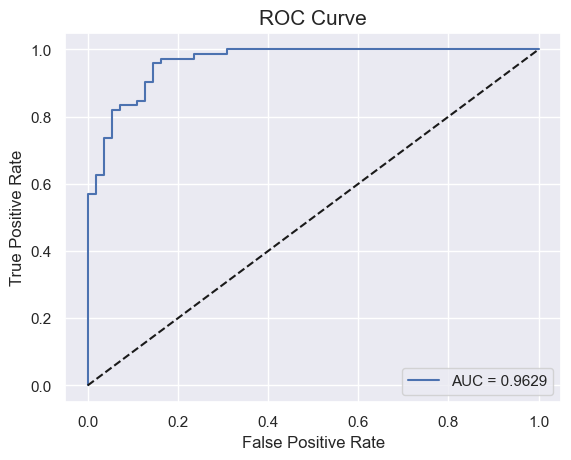

In [89]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

Conclusion

High accuracy 88.97% and High AUC 0.9629 value in RandomForest Model